In [297]:
using DynamicalSystems
using Plots
using Flux
using LinearAlgebra
# Graphs 
using LightGraphs, SimpleWeightedGraphs
using GraphPlot
gr()

Plots.GRBackend()

### Lorenz System

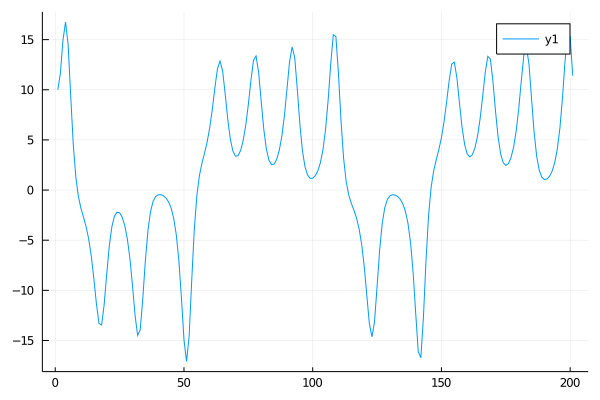

In [211]:
lorenz = DynamicalSystemsBase.Systems.lorenz([10.0, 10.0, 10.0]; σ = 10.0, ρ = 28.0, β = 8/3);
u = trajectory(lorenz, 10.0; dt = 0.05)
plot(u[:,1])

### Reservoir

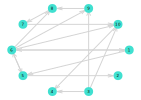

In [304]:
Dᵣ = 10
while true
    G = erdos_renyi(10, 0.1, is_directed=true)
    if is_connected(G) == true
        break
    end
end
gplot(G, layout=circular_layout, nodelabel=1:N)

### Adjacency matrix

In [305]:
A = adjacency_matrix(G);
#Wᵢₙ = rand(0:100, Dᵣ, 3)*0.0005;
maximum(abs.(eigvals(Array(A))))

1.6180339887498947

### Equation of motion reservoir + driving

In [306]:
function loop(r, p, t)
    A = p[1]; Wᵢₙ = p[2]
    rₜ₊₁ = []
    for i ∈ 1:Dᵣ
        rₜ₊₁ = append!(rₜ₊₁, tanh((Array(A[i,:])' * r) + (Array(Wᵢₙ[i,:])' * u[t])))
    end
    return SVector{10}(rₜ₊₁)
end

loop (generic function with 1 method)

### Discrete dynamical system

In [307]:
p = [A, Wᵢₙ]
Reservoir = DiscreteDynamicalSystem(loop, zeros(10), p; t0 = 1);

In [308]:
tr = trajectory(Reservoir, length(u)-1)

10-dimensional Dataset{Float64} with 201 points
 0.0       0.0       0.0        0.0         …  0.0       0.0       0.0
 0.638122  0.832123  0.413644   0.244919       0.757362  0.777888  0.52629
 0.984601  0.943605  0.974915   0.378393       0.963364  0.980872  0.809033
 0.998928  0.984929  0.996223   0.482914       0.993957  0.996625  0.927605
 0.999634  0.991977  0.998758   0.4881         0.997624  0.998621  0.963941
 0.999641  0.982927  0.998946   0.371023    …  0.996695  0.997864  0.955723
 0.999245  0.937213  0.997966   0.230148       0.990398  0.993528  0.899277
 0.998402  0.836827  0.995229   0.145129       0.97357   0.983695  0.788199
 0.997244  0.716289  0.98995    0.10308        0.943195  0.969604  0.669355
 0.995861  0.602211  0.981943   0.0770832      0.89601   0.951845  0.570853
 0.994201  0.491337  0.971362   0.0534487   …  0.826927  0.92782   0.48464
 0.992175  0.37227   0.956981   0.0266598      0.731175  0.89153   0.398989
 0.989676  0.235178  0.935414  -0.00590657     

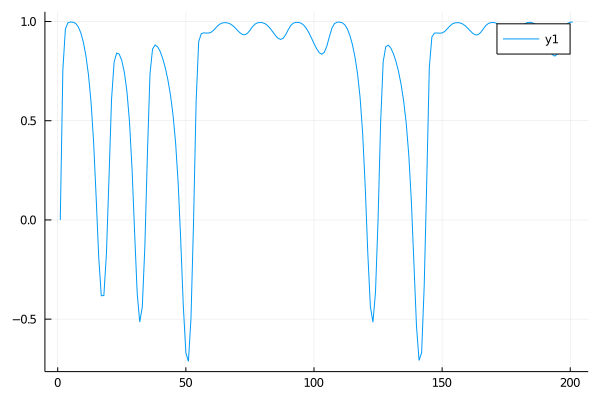

In [309]:
plot(tr[:,8])

In [310]:
Φ = Chain(Dense(Dᵣ,3)) 
loss(x,y) = sum(abs2, Φ(x) .- y)
ps = Flux.params(Φ);

data = zip(tr, u);
loss(tr[10], u[10])
@epochs 10000 Flux.train!(loss, ps, data, ADAM(0.01))

┌ Info: Epoch 1
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 2
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 3
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 4
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 5
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 6
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 7
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 8
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 9
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 10
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 11
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\s

In [318]:
test = []
for i ∈ 1:length(u)
    test = push!(test, Φ(tr[i,:])[3])
end

In [319]:
loss(tr[10], u[10])

11.070475929140404

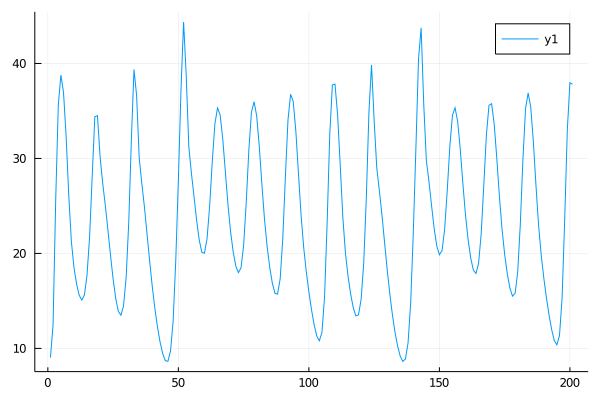

In [320]:
plot(test)

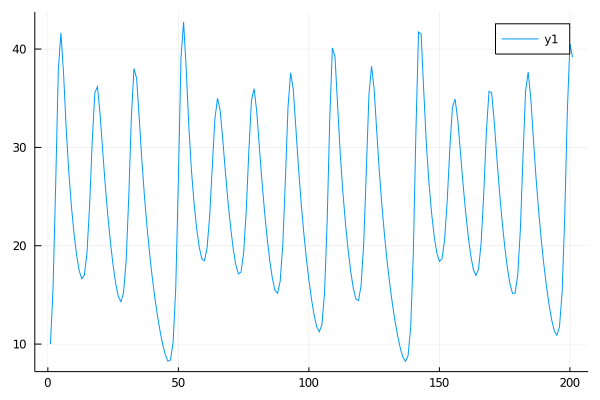

In [321]:
plot(u[:,3])